## Merging data

There are two ways to combine datasets in GeoPandas – attribute joins and spatial joins.


In [6]:
import geodatasets
import geopandas
import pandas as pd

In [2]:
chicago = geopandas.read_file(geodatasets.get_path("geoda.chicago_commpop"))

groceries = geopandas.read_file(geodatasets.get_path("geoda.groceries"))

chicago_shapes = chicago[['geometry', 'NID']]

chicago_names = chicago[['community', 'NID']]

chicago = chicago[['geometry', 'community']].to_crs(groceries.crs)

<Axes: >

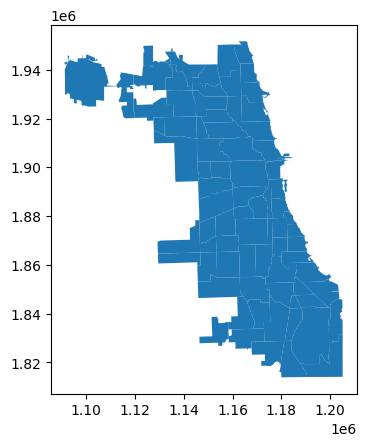

In [11]:
chicago.plot()

<Axes: >

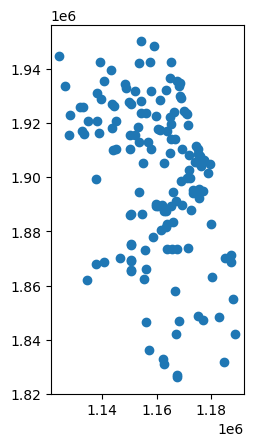

In [12]:
groceries.plot()

### Appending

Appending GeoDataFrame and GeoSeries uses pandas concat() function. Keep in mind, that appended geometry columns needs to have the same CRS.


In [7]:
joined = pd.concat([chicago.geometry, groceries.geometry])

douglas = chicago[chicago.community == 'DOUGLAS']

oakland = chicago[chicago.community == 'OAKLAND']

douglas_oakland = pd.concat([douglas, oakland])

<Axes: >

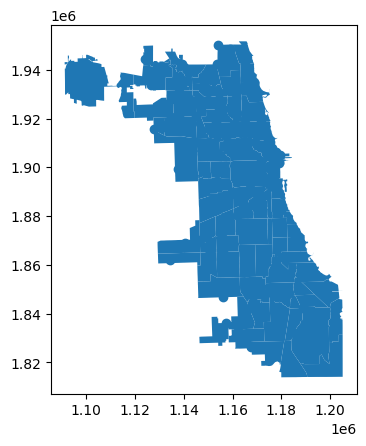

In [9]:
joined.plot()

In [13]:
chicago_shapes.head()

,geometry,NID
0,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...",35
1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...",36
2,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ...",37
3,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ...",38
4,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ...",39


In [14]:
chicago_names.head()

,community,NID
0,DOUGLAS,35
1,OAKLAND,36
2,FULLER PARK,37
3,GRAND BOULEVARD,38
4,KENWOOD,39


### Attribute joins

Attribute joins are accomplished using the merge() method. In general, it is recommended to use the merge() method called from the spatial dataset. With that said, the stand-alone pandas.merge() function will work if the GeoDataFrame is in the left argument; if a DataFrame is in the left argument and a GeoDataFrame is in the right position, the result will no longer be a GeoDataFrame.

For example, consider the following merge that adds full names to a GeoDataFrame that initially has only area ID for each geometry by merging it with a DataFrame.


In [16]:
chicago_shapes = chicago_shapes.merge(chicago_names, on='NID')
chicago_shapes.head()

,geometry,NID,community_x,community_y
0,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...",35,DOUGLAS,DOUGLAS
1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...",36,OAKLAND,OAKLAND
2,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ...",37,FULLER PARK,FULLER PARK
3,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ...",38,GRAND BOULEVARD,GRAND BOULEVARD
4,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ...",39,KENWOOD,KENWOOD


## Spatial joins

In a spatial join, two geometry objects are merged based on their spatial relationship to one another.


In [18]:
groceries_with_community = groceries.sjoin(chicago, how="inner", predicate='intersects')

In [20]:
groceries_with_community.head()

,OBJECTID,Ycoord,Xcoord,Status,Address,Chain,Category,geometry,index_right,community
0,16,41.973266,-87.657073,OPEN,"1051 W ARGYLE ST, CHICAGO, IL. 60640",VIET HOA PLAZA,None,MULTIPOINT ((1168268.672 1933554.350)),30,UPTOWN
1,18,41.696367,-87.681315,OPEN,"10800 S WESTERN AVE, CHICAGO, IL. 60643-3226",COUNTY FAIR FOODS,None,MULTIPOINT ((1162302.618 1832900.224)),73,MORGAN PARK
2,22,41.868634,-87.638638,OPEN,"1101 S CANAL ST, CHICAGO, IL. 60607-4932",WHOLE FOODS MARKET,None,MULTIPOINT ((1173317.042 1895425.426)),28,NEAR WEST SIDE
3,23,41.877590,-87.654953,OPEN,"1101 W JACKSON BLVD, CHICAGO, IL. 60607-2905",TARGET/SUPER,new,MULTIPOINT ((1168996.475 1898801.406)),28,NEAR WEST SIDE
4,27,41.737696,-87.625795,OPEN,"112 W 87TH ST, CHICAGO, IL. 60620-1318",FOOD 4 LESS,None,MULTIPOINT ((1176991.989 1847262.423)),39,CHATHAM


<Axes: >

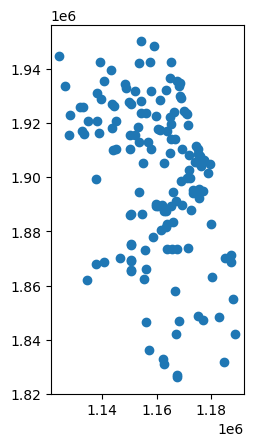

In [19]:
groceries_with_community.plot()

### GeoPandas provides two spatial-join functions:

GeoDataFrame.sjoin(): joins based on binary predicates (intersects, contains, etc.)

GeoDataFrame.sjoin_nearest(): joins based on proximity, with the ability to set a maximum search radius.


### Binary predicates joins

- intersects
- contains
- within
- touches
- crosses
- overlaps
